<a href="https://colab.research.google.com/github/Marianno77/data-science/blob/main/Uczenie_G%C5%82%C4%99bokie/Sie%C4%87_neuronowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sieć neuronowa**

## Import bibliotek

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import tensorflow as tf

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.17.1


## Załadowanie i przygotowanie danych

In [104]:
(X_train, y_train), (X_test, y_test) = load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [105]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [106]:
print(y_train[0])

5


In [107]:
print(X_train[0].shape)

(28, 28)


In [108]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

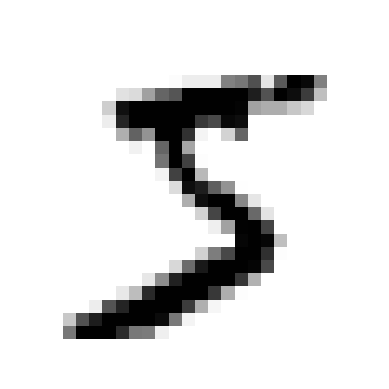

In [109]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')


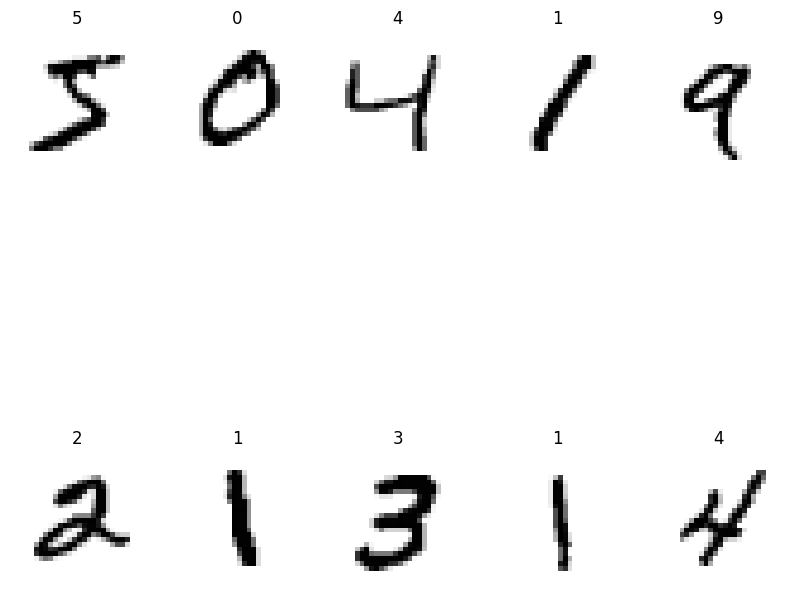

In [110]:
plt.figure(figsize=(10, 10))
for i in range(1, 11):
  plt.subplot(2, 5, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1])

plt.show()

## Budowa sieci neuronowej

In [111]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Trenowanie modelu

In [112]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8580 - loss: 0.4839
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9543 - loss: 0.1545
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9681 - loss: 0.1066
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9738 - loss: 0.0850
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9774 - loss: 0.0700


## Ocena modelu

In [113]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.0780


[0.07801523804664612, 0.9767000079154968]

In [114]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.912817,0.298796
1,0.956767,0.142912
2,0.968250,0.105971
3,0.973017,0.087945
4,0.975900,0.074684


In [115]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.show()

## Predykcja na podstawie modelu

In [116]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.00000004277 , 0.000000005712, 0.000005416824, ..., 0.99977636    , 0.000000255561, 0.000003267266],
       [0.000003617694, 0.000000824825, 0.9997395     , ..., 0.000000000003, 0.000003052948, 0.000000000002],
       [0.000000921792, 0.99839133    , 0.000088381144, ..., 0.0013232495  , 0.00009567104 , 0.000003017124],
       ...,
       [0.00000000011 , 0.000000000054, 0.000000000016, ..., 0.000000579505, 0.00000335007 , 0.000002130679],
       [0.0000000034  , 0.000000000672, 0.000000000222, ..., 0.000000000034, 0.000024426634, 0.000000000016],
       [0.000000003149, 0.000000000007, 0.000000077162, ..., 0.            , 0.000000000148, 0.000000000005]],
      dtype=float32)

In [117]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [118]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [119]:
missclassified = pred[pred['y_test'] != pred['y_pred']]
len(missclassified)

233

In [120]:
missclassified.head(10)

,y_test,y_pred
151,9,8
247,4,2
274,9,3
321,2,7
340,5,3
381,3,7
445,6,0
448,9,8
495,8,0
582,8,2


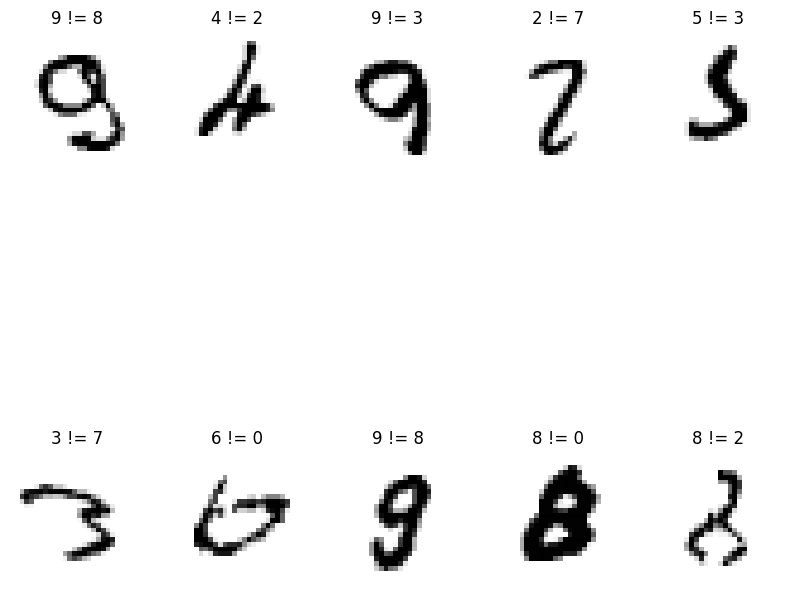

In [121]:
plt.figure(figsize=(10, 10))
for i, j in zip(range(1, 11), missclassified.index[:10]):
  plt.subplot(2, 5, i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title(f'{y_test[j]} != {y_pred[j]}')

plt.show()